Ok so there are three samples, which look like backcrosses in the RADseq NEWHYBRIDS analyses. Our theory is that backcrossing is associated with a change in ploidy, so I want to check to see if these samples have any plody differences. 

The approach is this:

1) Find species specific alleles for crucian and gibel.  
2) Look at the allele specific coverage at these loci in the hybrids

I should see that the allele depth ratio between alleles is much higher in triploids than diploids, so if any samples were diploid, they should stand out. 



To find loci with species specific SNPs, I will look for loci with an Fst of 1 between crucian and gibel. I will do this with the Fst file for cru and gib from populations 

In [1]:
from __future__ import division

In [89]:
cru_gib_fsts = open("/Users/danieljeffries/Dropbox/New_Stacks_triploids/Populations_cru_gibel/batch_1.fst_Ccar-Cgib.tsv", 'r')
count =0
fixed = []
for line in cru_gib_fsts.readlines():
    if not line.startswith("#"):
        Locus_ID = "%s_%s" % (line.split()[1], line.split()[6])
        Fst = line.split()[8]
        if float(Fst) == 1:
            count += 1
            fixed.append(Locus_ID)
print "%s fixed SNPs" % count


1304 fixed SNPs


So there are ~1300 fixed SNPs out of a possible 1720! Thats a lot! 

I wonder if there is a problem with the sampling here, I only have very few gibel, so it is likely that I am not picking up all of their diversity. Thus, what looks fixed in gibel is likely just poorly sampled diversity. 

But there is nothing I can do about it. . . . I will keep going from here with these "species specific" SNPs


In [4]:
import vcf

myvcf = vcf.Reader(open("/Users/danieljeffries/Dropbox/New_Stacks_triploids/Populations_cru_gibel/batch_1.vcf", 'r'))

sample_cov_ratios = {}

for record in myvcf:
    if record.ID in fixed:
        for sample in record.samples:
            if sample.sample not in sample_cov_ratios:
                sample_cov_ratios[sample.sample] = []
            if sample.is_het:
                cov_ratio = min(sample["AD"])/max(sample["AD"])
                sample_cov_ratios[sample.sample].append(cov_ratio)


In [7]:
sample_cov_ratios.keys()

['GBR4_2',
 'GBR4_3',
 'POL4_7',
 'POL3_10',
 'GBR4_6',
 'GBR4_7',
 'GBR4_4',
 'GBR4_5',
 'GBR4_8',
 'GBR4_9',
 'FIN2_39',
 'UKR1_1',
 'UKR2_3',
 'SWE2_1',
 'SWE2_2',
 'SWE2_3',
 'SWE2_4',
 'SWE2_5',
 'SWE2_6',
 'SWE2_7',
 'SWE2_8',
 'SWE2_9',
 'SWE14_8',
 'SWE14_2',
 'SWE14_3',
 'GBR8_4',
 'GBR8_5',
 'SWE14_6',
 'GBR8_3',
 'SWE14_4',
 'POL3_4',
 'DEN1_9',
 'DEN1_8',
 'BEL1_19',
 'BEL1_18',
 'SWE10_8',
 'SWE10_9',
 'BEL1_15',
 'SWE10_7',
 'BEL1_17',
 'BEL1_16',
 'DEN1_5',
 'DEN1_4',
 'DEN1_7',
 'DEN1_6',
 'SWE10_6',
 'SWE12_2',
 'SWE12_7',
 'DEN1_3',
 'HUN4_10',
 'SWE10_5',
 'HUN4_16',
 'SWE10_4',
 'HUN4_15',
 'SWE10_2',
 'SWE20_6',
 'SWE8_1',
 'SWE10_3',
 'SWE10_1',
 'SWE12_1',
 'RUS1_1',
 'RUS1_2',
 'RUS1_3',
 'RUS1_4',
 'RUS1_5',
 'RUS1_6',
 'RUS1_7',
 'RUS1_8',
 'RUS1_9',
 'UKR2_4',
 'FIN4_8',
 'FIN4_9',
 'SWE12_12',
 'FIN4_3',
 'SWE12_10',
 'FIN4_1',
 'FIN4_6',
 'FIN4_7',
 'FIN4_4',
 'FIN4_5',
 'DEN1_11',
 'DEN1_10',
 'DEN1_12',
 'NOR2_7',
 'POL3_9',
 'POL3_8',
 'NOR2_2',
 'NOR2_3

In [10]:
import numpy as np

for sample in sample_cov_ratios:
    sample
    if len(sample_cov_ratios[sample]) > 10:
        print sample, len(sample_cov_ratios[sample]), np.mean(sample_cov_ratios[sample])
        

SWE20_8 853 0.569851082575
SWE20_7 836 0.560612442815
FIN2_35 1118 0.723322063368
FIN2_38 1066 0.709601215623
FIN2_34 1116 0.768795615156
FIN2_36 1131 0.789555140436
FIN2_37 1125 0.745885058027
SWE20_11 828 0.598235223264


In [11]:
samples = []

for sample in sample_cov_ratios:
    if len(sample_cov_ratios[sample]) > 10:
        samples.append(sample)

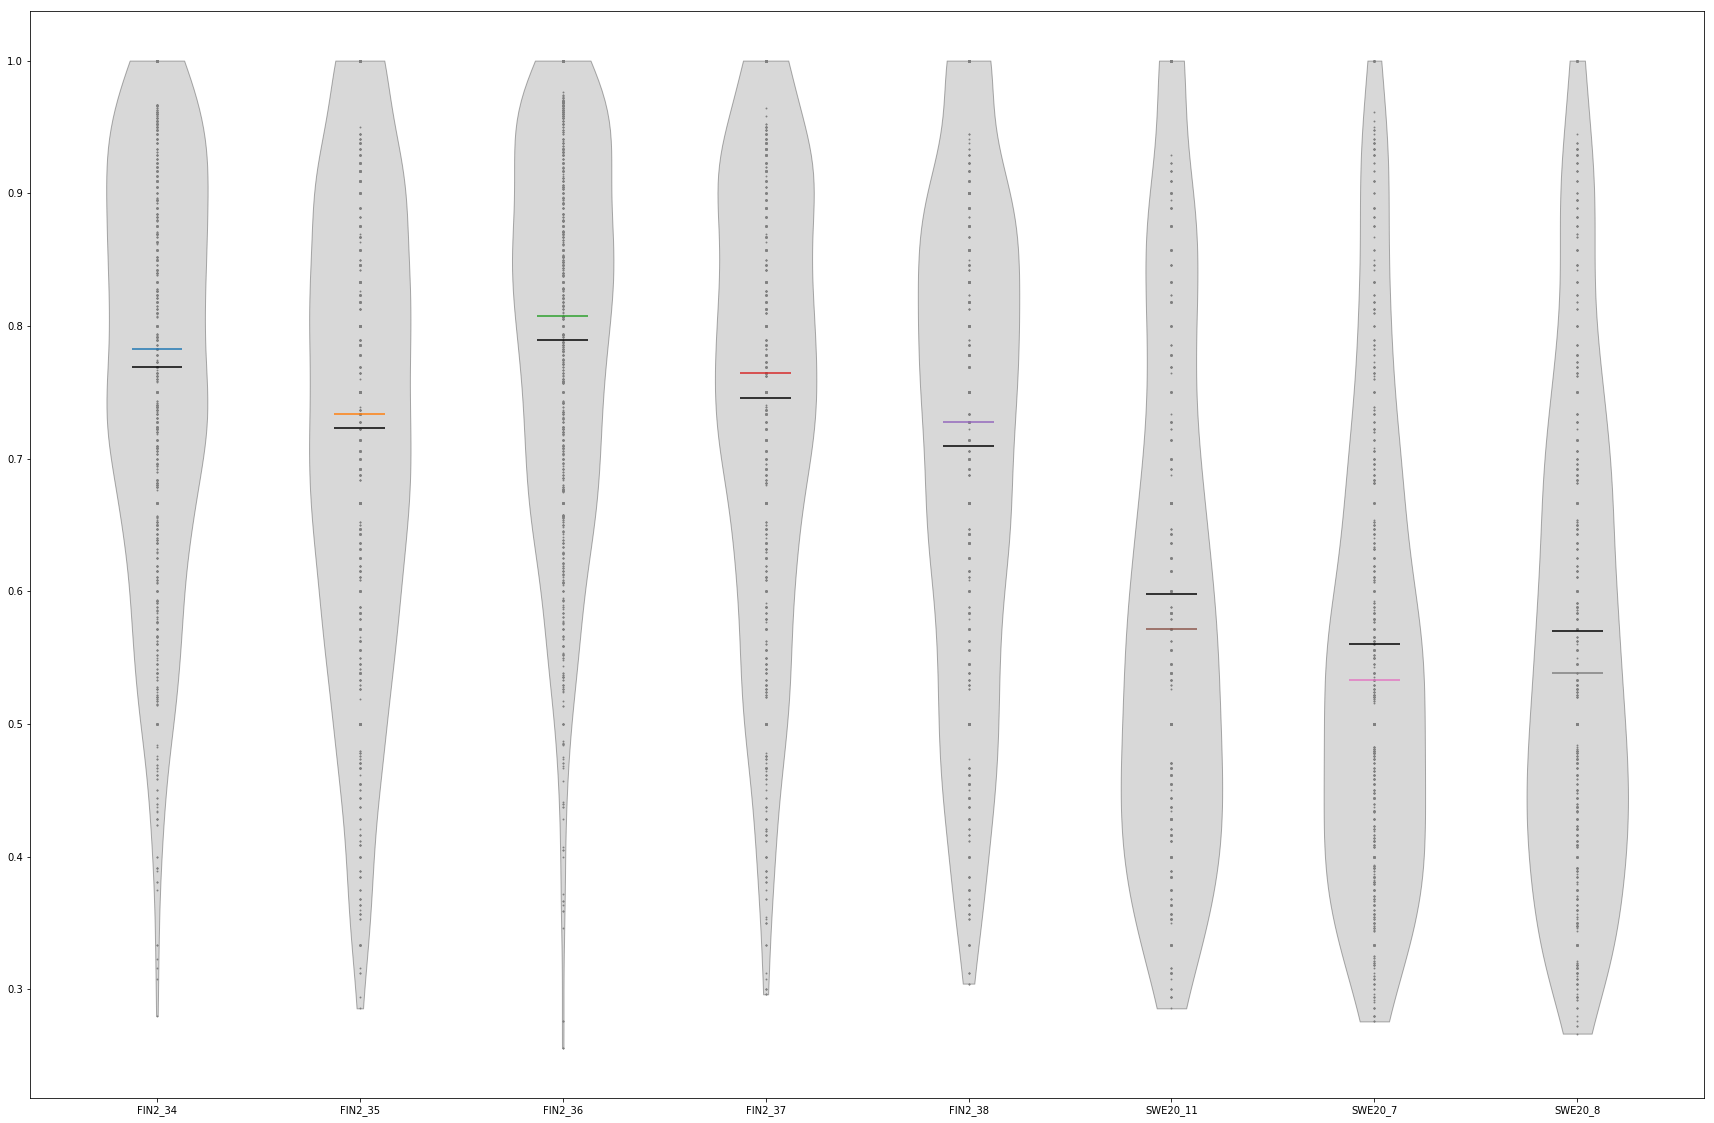

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize = (30,20))

x_coord = 1
xcoords = []

for sample in sorted(samples):
    if len(sample_cov_ratios[sample]) > 10:
        xcoords.append(x_coord)
        vio = plt.violinplot(sample_cov_ratios[sample], positions = [x_coord], showmeans = True, showmedians=True, showextrema = False)
        for pc in vio["bodies"]:
            pc.set_facecolor('grey')
            pc.set_edgecolor('Black')
        vio["cmeans"].set_edgecolor("Black")
        plt.scatter([x_coord]*len(sample_cov_ratios[sample]), sample_cov_ratios[sample], s = 0.8, c = "grey")
        x_coord += 1

    
plt.xticks(xcoords, sorted(samples))
        
plt.show()

Ok, so I think its worked well - limiting the analyses only to samples which have > 10 loci which are both fixed between species and heterozygous in the hybrids was the trick, box plots only make sense when made with >10 or so loci. 

So this is ready to go in as a Supp fig to the paper I think!


### Designate alleles as crucian or gibel

In [63]:
import vcf
from collections import Counter

locus_dict = {}

gibel = ["BEL5_2",
         "BEL5_3",
         "BEL5_4",
         "BEL5_5",
         "BEL5_6"]

crucian = ["DEN1_10",
           "DEN1_11",
           "DEN1_12",
           "DEN1_3",
           "DEN1_4",
           "DEN1_5",
           "DEN1_6",
           "DEN1_7",
           "DEN1_8",
           "DEN1_9"]


myvcf = vcf.Reader(open("/Users/danieljeffries/Dropbox/New_Stacks_triploids/Populations_cru_gibel/batch_1.vcf", 'r'))

for record in myvcf:

    gibel_alleles = []
    crucian_alleles = []

    for sample in record.samples:
        if sample.called:
            sample_allele = sample.gt_bases.split("/")[0]
            if not sample.is_het:

                if sample.sample in gibel:
                    gibel_alleles.append(sample_allele)

                elif sample.sample in crucian:
                    crucian_alleles.append(sample_allele)

    if all([len(crucian_alleles) > 3, len(gibel_alleles) > 3]):
        crucian_allele = crucian_alleles[0]
        gibel_allele = gibel_alleles[0]

        if crucian_allele != gibel_allele:

            locus_dict[record.ID] = {}
            locus_dict[record.ID]["cru"] = crucian_allele
            locus_dict[record.ID]["gib"] = gibel_allele


In [65]:
locus_dict

{'40100_59': {'cru': 'A', 'gib': 'G'},
 '44801_29': {'cru': 'T', 'gib': 'C'},
 '25602_58': {'cru': 'G', 'gib': 'A'},
 '12447_64': {'cru': 'C', 'gib': 'T'},
 '50528_25': {'cru': 'A', 'gib': 'G'},
 '9042_40': {'cru': 'C', 'gib': 'T'},
 '40773_77': {'cru': 'A', 'gib': 'G'},
 '3054_47': {'cru': 'T', 'gib': 'C'},
 '13227_71': {'cru': 'T', 'gib': 'C'},
 '15005_71': {'cru': 'A', 'gib': 'G'},
 '6584_37': {'cru': 'A', 'gib': 'G'},
 '14976_21': {'cru': 'A', 'gib': 'G'},
 '1405_77': {'cru': 'C', 'gib': 'A'},
 '10124_58': {'cru': 'A', 'gib': 'G'},
 '48058_31': {'cru': 'G', 'gib': 'A'},
 '43823_8': {'cru': 'T', 'gib': 'G'},
 '142_80': {'cru': 'A', 'gib': 'T'},
 '45030_61': {'cru': 'G', 'gib': 'T'},
 '1218_74': {'cru': 'G', 'gib': 'A'},
 '14155_62': {'cru': 'A', 'gib': 'G'},
 '26975_53': {'cru': 'G', 'gib': 'C'},
 '2193_42': {'cru': 'A', 'gib': 'G'},
 '21951_19': {'cru': 'T', 'gib': 'C'},
 '33227_30': {'cru': 'T', 'gib': 'A'},
 '4266_89': {'cru': 'C', 'gib': 'T'},
 '46053_85': {'cru': 'A', 'gib': 'G

### Get per allele coverages

In [100]:
sample_dict = {}

hybs = ['FIN2_38',
        'SWE20_11',
        'SWE20_8',
        'SWE20_7',
        'FIN2_34',
        'FIN2_35',
        'FIN2_36',
        'FIN2_37']

myvcf = vcf.Reader(open("/Users/danieljeffries/Dropbox/New_Stacks_triploids/Populations_cru_gibel/batch_1.vcf", 'r'))

for record in myvcf:
    if record.ID in fixed:
        for sample in record.samples:
            if sample.sample in hybs:
                if sample.is_het:

                    if sample.sample not in sample_dict:
                        sample_dict[sample.sample] = {}

                    sample_dict[sample.sample][record.ID] = {}
                    sample_dict[sample.sample][record.ID]["cru_cov"] = sample.data[2][0]
                    sample_dict[sample.sample][record.ID]["gib_cov"] = sample.data[2][1]


In [101]:
sample_dict.keys()

['FIN2_38',
 'SWE20_11',
 'SWE20_8',
 'SWE20_7',
 'FIN2_34',
 'FIN2_35',
 'FIN2_36',
 'FIN2_37']

In [113]:
with open("/Users/danieljeffries/Desktop/Cru_gib_covs.out", 'w') as outs:
    
    lines = []
    for locus in sorted(fixed):
        
        header = []
        header.append("Locus")
        
        line = []
        line.append(locus)
        
        for sample in sorted(sample_dict.keys()):
            header.append("%s_cru" % sample)
            header.append("%s_gib" % sample)
            if locus in sample_dict[sample]:
                line.append(str(sample_dict[sample][locus]["cru_cov"]))
                line.append(str(sample_dict[sample][locus]["gib_cov"]))
            else:
                line.append("NA")
                line.append("NA")
                
        line.append("\n")
        full_line = "\t".join(line)
        lines.append(full_line)
        
    header.append("\n")
    outs.write("\t".join(header))
    
    for line in lines:
        outs.write(line)
    

In [86]:
locus_dict

{'40100_59': {'cru': 'A', 'cru_cov': 8.0, 'gib': 'G', 'gib_cov': 8.0},
 '44801_29': {'cru': 'T', 'cru_cov': 16.0, 'gib': 'C', 'gib_cov': 6.0},
 '25602_58': {'cru': 'G', 'cru_cov': 21.0, 'gib': 'A', 'gib_cov': 14.0},
 '12447_64': {'cru': 'C', 'cru_cov': 17.0, 'gib': 'T', 'gib_cov': 10.0},
 '50528_25': {'cru': 'A', 'cru_cov': 7.0, 'gib': 'G', 'gib_cov': 9.0},
 '9042_40': {'cru': 'C', 'cru_cov': 17.0, 'gib': 'T', 'gib_cov': 9.0},
 '40773_77': {'cru': 'A', 'cru_cov': 22.0, 'gib': 'G', 'gib_cov': 9.0},
 '3054_47': {'cru': 'T', 'cru_cov': 24.0, 'gib': 'C', 'gib_cov': 9.0},
 '13227_71': {'cru': 'T', 'cru_cov': 16.0, 'gib': 'C', 'gib_cov': 6.0},
 '15005_71': {'cru': 'A', 'cru_cov': 19.0, 'gib': 'G', 'gib_cov': 8.0},
 '6584_37': {'cru': 'A', 'cru_cov': 18.0, 'gib': 'G', 'gib_cov': 22.0},
 '14976_21': {'cru': 'A', 'cru_cov': 12.0, 'gib': 'G', 'gib_cov': 7.0},
 '1405_77': {'cru': 'C', 'cru_cov': 7.0, 'gib': 'A', 'gib_cov': 10.0},
 '10124_58': {'cru': 'A', 'cru_cov': 19.0, 'gib': 'G', 'gib_cov': 8

In [ ]:
for record in myvcf:
    if record.ID == "13539_55"
    